### Notebook for running SCOT on SNARE-seq Cell Mixture Data
**Note:** This version of the notebook runs a new setting for SCOT, where we use correlation as a metrix for building kNN graphs and use connectivity information from this graph in adjacency matrices fed into the optimal transport algorithm.  

Access to the raw dataset: Gene Expression Omnibus accession no GSE126074  
SNARE-seq data in `/data` folder containes the version with dimensionality reduction techniques applied from the original SNARE-seq paper (https://www.nature.com/articles/s41587-019-0290-0)    
SCOT software has been updated on 20 September 2020. It now outputs error statements for convergence issues. When it runs into numerical instabilities in convergence, it outputs None, None instead of X_new, y_new. If you run into such an error, please try using a larger epsilon value for the entropic regularization.  

If you have any questions, e-mail: ritambhara@brown.edu, pinar_demetci@brown.edu, rebecca_santorella@brown.edu  

In [1]:
import src.utils as ut
import src.evals as evals
from src.scot import *

In [2]:
X=np.load("data/scatac_feat.npy") #Unlike the other notebook, we don't need to correct the log transformation. 
# log transformation makes little difference when considering correlations in kNN graphs as opposed to Euclidean distances.
y=np.load("data/scrna_feat.npy")
print("Dimensions of input datasets are: ", "X= ", X.shape, " y= ", y.shape)

Dimensions of input datasets are:  X=  (1047, 19)  y=  (1047, 10)


In [3]:
X=ut.unit_normalize(X)
y=ut.unit_normalize(y)

## If you'd like to apply z-score normalization instead:
# X=ut.zscore_standardize()
# y=ut.zscore_standardize()
# Note that zscore_standardize doesn't yield as good results on this dataset and MMD-MA and UnionCom comparisons 
# also used unit (l-2) normalization

In [4]:
# Set hyperparameters of the algorithm:
k=50
e=0.0005
X_new,y_new= scot(X, y, k, e, mode="connectivity", metric="correlation")

It.  |Err         
-------------------
    0|2.152968e-03|
   10|6.118185e-04|
   20|8.246992e-05|
   30|3.894956e-05|
   40|3.216470e-05|
   50|3.068255e-05|
   60|2.850152e-05|
   70|2.484922e-05|
   80|2.042939e-05|
   90|1.618798e-05|
  100|1.259759e-05|
  110|9.709774e-06|
  120|7.426016e-06|
  130|5.636091e-06|
  140|4.246817e-06|
  150|3.179940e-06|
  160|2.368862e-06|
  170|1.757536e-06|
  180|1.299939e-06|
  190|9.592410e-07|
It.  |Err         
-------------------
  200|7.066033e-07|
  210|5.198315e-07|
  220|3.820633e-07|
  230|2.806101e-07|
  240|2.059904e-07|
  250|1.511563e-07|
  260|1.108881e-07|
  270|8.133075e-08|
  280|5.964305e-08|
  290|4.373381e-08|
  300|3.206565e-08|
  310|2.350916e-08|
  320|1.723517e-08|
  330|1.263514e-08|
  340|9.262639e-09|
  350|6.790190e-09|
  360|4.977643e-09|
  370|3.648897e-09|
  380|2.674833e-09|
  390|1.960783e-09|
It.  |Err         
-------------------
  400|1.437344e-09|
  410|1.053637e-09|
  420|7.723608e-10|


##### Evaluate results:

In [5]:
fracs=evals.calc_domainAveraged_FOSCTTM(X_new, y_new)
print("Average FOSCTTM score for this alignment is: ", np.mean(fracs))

Average FOSCTTM score for this alignment is:  0.14902407132460765


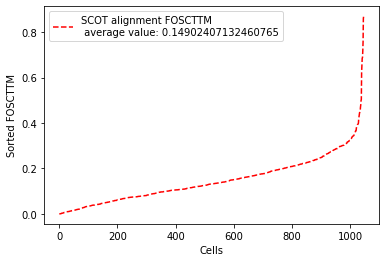

In [6]:
import matplotlib.pyplot as plt
legend_label="SCOT alignment FOSCTTM \n average value: "+str(np.mean(fracs))
plt.plot(np.arange(len(fracs)), np.sort(fracs), "r--", label=legend_label)
plt.legend()
plt.xlabel("Cells")
plt.ylabel("Sorted FOSCTTM")
plt.show()

##### Visualize Projections

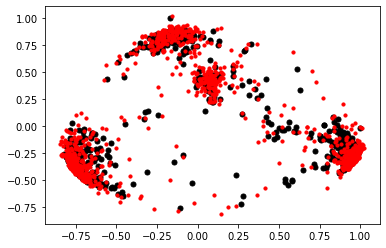

In [7]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

pca=PCA(n_components=2)
X_pca=pca.fit_transform(X_new)
y_pca=pca.fit_transform(y_new)

plt.scatter(X_pca[:,0], X_pca[:,1], c="k", s=25, label="Chromatin Accessibility")
plt.scatter(y_pca[:,0], y_pca[:,1], c="r", s=10, label="Gene Expression")

##### Performing alignment by projecting RNA-seq (gene expression, y domain) onto ATAC-seq (chromatin accessibility, X domain)

In [8]:
# Set hyperparameters of the algorithm:
k=50
e=0.0005
X_new,y_new= scot(X, y, k, e, mode="connectivity", metric="correlation", XontoY=False) 
#Set XontoY to false so it performs Y-onto-X projection
fracs=evals.calc_domainAveraged_FOSCTTM(X_new, y_new)
print("Average FOSCTTM score for this alignment is: ", np.mean(fracs))

It.  |Err         
-------------------
    0|2.152968e-03|
   10|6.118185e-04|
   20|8.246992e-05|
   30|3.894956e-05|
   40|3.216470e-05|
   50|3.068255e-05|
   60|2.850152e-05|
   70|2.484922e-05|
   80|2.042939e-05|
   90|1.618798e-05|
  100|1.259759e-05|
  110|9.709774e-06|
  120|7.426016e-06|
  130|5.636091e-06|
  140|4.246817e-06|
  150|3.179940e-06|
  160|2.368862e-06|
  170|1.757536e-06|
  180|1.299939e-06|
  190|9.592410e-07|
It.  |Err         
-------------------
  200|7.066033e-07|
  210|5.198315e-07|
  220|3.820633e-07|
  230|2.806101e-07|
  240|2.059904e-07|
  250|1.511563e-07|
  260|1.108881e-07|
  270|8.133075e-08|
  280|5.964305e-08|
  290|4.373381e-08|
  300|3.206565e-08|
  310|2.350916e-08|
  320|1.723517e-08|
  330|1.263514e-08|
  340|9.262639e-09|
  350|6.790190e-09|
  360|4.977643e-09|
  370|3.648897e-09|
  380|2.674833e-09|
  390|1.960783e-09|
It.  |Err         
-------------------
  400|1.437344e-09|
  410|1.053637e-09|
  420|7.723608e-10|
Average FOSCTTM score f

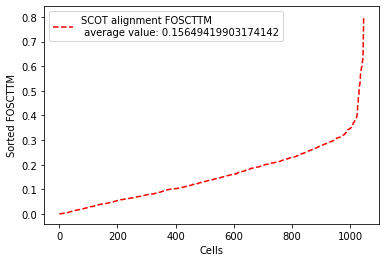

In [9]:
import matplotlib.pyplot as plt
legend_label="SCOT alignment FOSCTTM \n average value: "+str(np.mean(fracs))
plt.plot(np.arange(len(fracs)), np.sort(fracs), "r--", label=legend_label)
plt.legend()
plt.xlabel("Cells")
plt.ylabel("Sorted FOSCTTM")
plt.show()

##### Visualize projection:

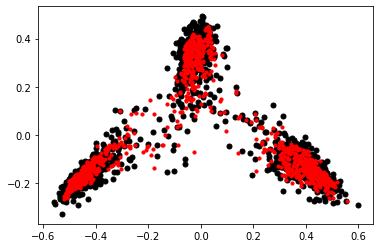

In [10]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

pca=PCA(n_components=2)
X_pca=pca.fit_transform(X_new)
y_pca=pca.fit_transform(y_new)

plt.scatter(X_pca[:,0], X_pca[:,1], c="k", s=25, label="Chromatin Accessibility")
plt.scatter(y_pca[:,0], y_pca[:,1], c="r", s=10, label="Gene Expression")